In [1]:
import pandas as pd
import numpy as np
from pathlib import Path

import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

%matplotlib inline

## Load and inspect data

In [2]:
ltc_df = pd.read_csv(Path('../../resources/prices/coin_Litecoin.csv'), index_col='SNo')
ltc_df

,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
SNo,,,,,,,,,
1,Litecoin,LTC,2013-04-29 23:59:59,4.573600,4.225640,4.366760,4.383900,0.000000e+00,7.538896e+07
2,Litecoin,LTC,2013-04-30 23:59:59,4.572380,4.168960,4.403520,4.296490,0.000000e+00,7.402092e+07
3,Litecoin,LTC,2013-05-01 23:59:59,4.356860,3.520290,4.289540,3.801010,0.000000e+00,6.560460e+07
4,Litecoin,LTC,2013-05-02 23:59:59,4.039300,3.007170,3.780020,3.371980,0.000000e+00,5.828798e+07
5,Litecoin,LTC,2013-05-03 23:59:59,3.453610,2.395940,3.390440,3.044910,0.000000e+00,5.269485e+07
...,...,...,...,...,...,...,...,...,...
2858,Litecoin,LTC,2021-02-23 23:59:59,208.369670,159.684673,208.123407,176.934915,1.094470e+10,1.177356e+10
2859,Litecoin,LTC,2021-02-24 23:59:59,189.165459,169.789009,176.966769,181.378501,7.205360e+09,1.207051e+10
2860,Litecoin,LTC,2021-02-25 23:59:59,204.743842,176.032145,181.385422,178.901843,7.327999e+09,1.190489e+10


In [3]:
ltc_df['Date'] = pd.to_datetime(ltc_df['Date']).dt.date
ltc_df['Date'] = pd.to_datetime(ltc_df['Date'])
ltc_df['Spread'] = ltc_df.High - ltc_df.Low
ltc_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2862 entries, 1 to 2862
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Name       2862 non-null   object        
 1   Symbol     2862 non-null   object        
 2   Date       2862 non-null   datetime64[ns]
 3   High       2862 non-null   float64       
 4   Low        2862 non-null   float64       
 5   Open       2862 non-null   float64       
 6   Close      2862 non-null   float64       
 7   Volume     2862 non-null   float64       
 8   Marketcap  2862 non-null   float64       
 9   Spread     2862 non-null   float64       
dtypes: datetime64[ns](1), float64(7), object(2)
memory usage: 246.0+ KB


## Plot the closing value of Litecoin over time

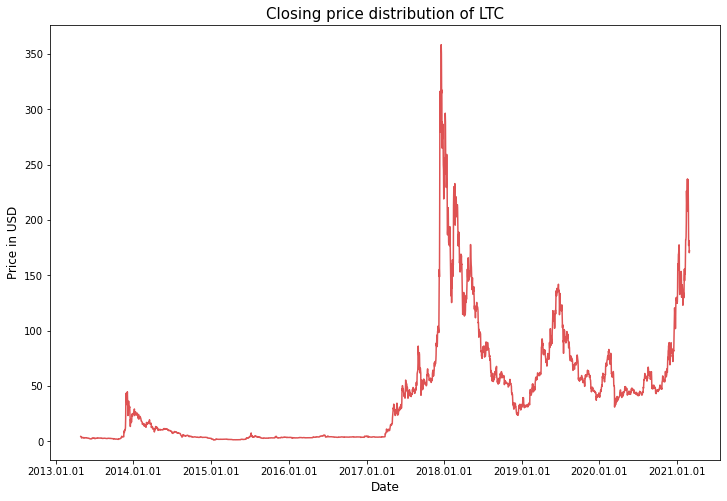

In [4]:
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(12,8))
# sns.lineplot(y = ltc_df.Close.values, x=ltc_df.Date_mpl.values, alpha=0.8, color=color[3])
sns.lineplot(y = ltc_df.Close.values, x=ltc_df.Date.values, alpha=0.8, color=color[3])
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y.%m.%d'))
# fig.autofmt_xdate()
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price in USD', fontsize=12)
plt.title("Closing price distribution of LTC", fontsize=15)
plt.show()

## Candlestick chart

In [5]:
import matplotlib.ticker as mticker
# from matplotlib.finance import candlestick_ohlc
import mplfinance as mpf

ltc_df['Date_mpl'] = ltc_df['Date'].apply(lambda x: mdates.date2num(x))

temp_ltc_df = ltc_df.copy(deep=False)
temp_ltc_df = temp_ltc_df.set_index(['Date'])
temp_ltc_df = temp_ltc_df.drop(['Name', 'Symbol', 'Marketcap','Spread'], axis=1)
temp_ltc_df

,High,Low,Open,Close,Volume,Date_mpl
Date,,,,,,
2013-04-29,4.573600,4.225640,4.366760,4.383900,0.000000e+00,15824.0
2013-04-30,4.572380,4.168960,4.403520,4.296490,0.000000e+00,15825.0
2013-05-01,4.356860,3.520290,4.289540,3.801010,0.000000e+00,15826.0
2013-05-02,4.039300,3.007170,3.780020,3.371980,0.000000e+00,15827.0
2013-05-03,3.453610,2.395940,3.390440,3.044910,0.000000e+00,15828.0
...,...,...,...,...,...,...
2021-02-23,208.369670,159.684673,208.123407,176.934915,1.094470e+10,18681.0
2021-02-24,189.165459,169.789009,176.966769,181.378501,7.205360e+09,18682.0
2021-02-25,204.743842,176.032145,181.385422,178.901843,7.327999e+09,18683.0


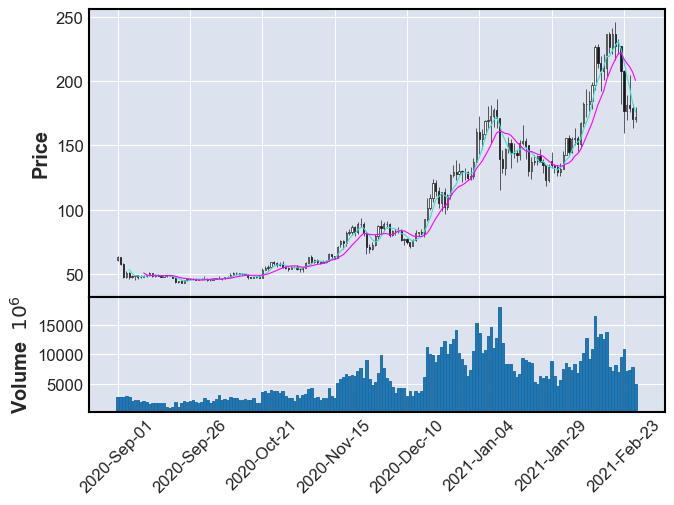

In [6]:
mpf.plot(temp_ltc_df.loc['2020-9-1':], type='candle', mav=(5,10), volume=True)

## Price prediction

In [7]:
from fbprophet import Prophet

In [8]:
INPUT_FILE = "coin_Litecoin.csv"

price_predict_df = pd.read_csv("../../resources/prices/" + INPUT_FILE, parse_dates=['Date'], usecols=["Date", "Close"])
price_predict_df.columns = ["ds", "y"]
price_predict_df = price_predict_df[price_predict_df['ds']>'2020-9-1']

m = Prophet(changepoint_prior_scale=.7)
m.fit(price_predict_df);
future = m.make_future_dataframe(periods=7)
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat,yhat_lower,yhat_upper
182,2021-03-02 23:59:59,221.001833,205.347004,237.183210
183,2021-03-03 23:59:59,224.346820,209.253906,238.967994
184,2021-03-04 23:59:59,225.095716,209.134910,241.369762
185,2021-03-05 23:59:59,228.528084,211.781758,243.699018
186,2021-03-06 23:59:59,232.337336,216.831862,248.098021


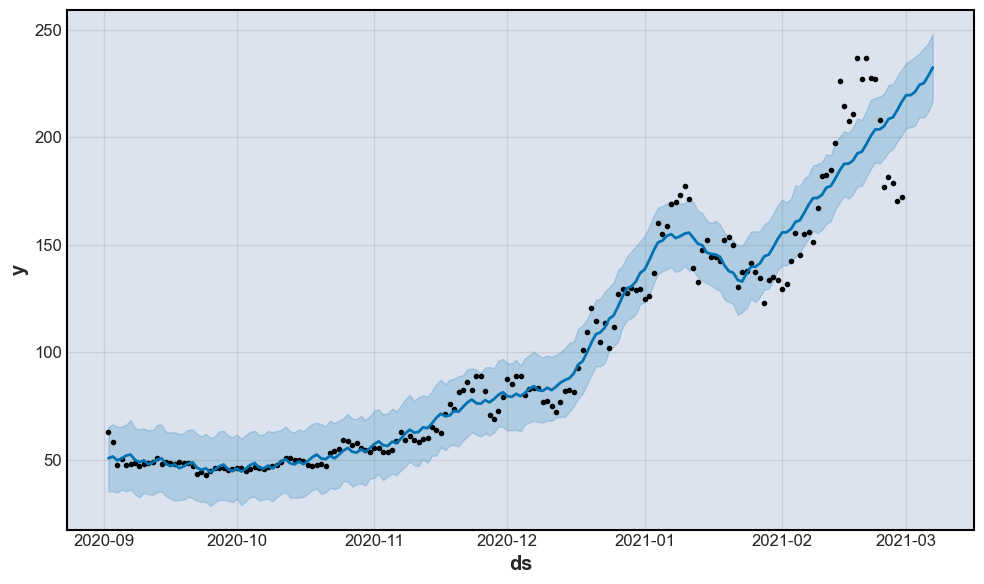

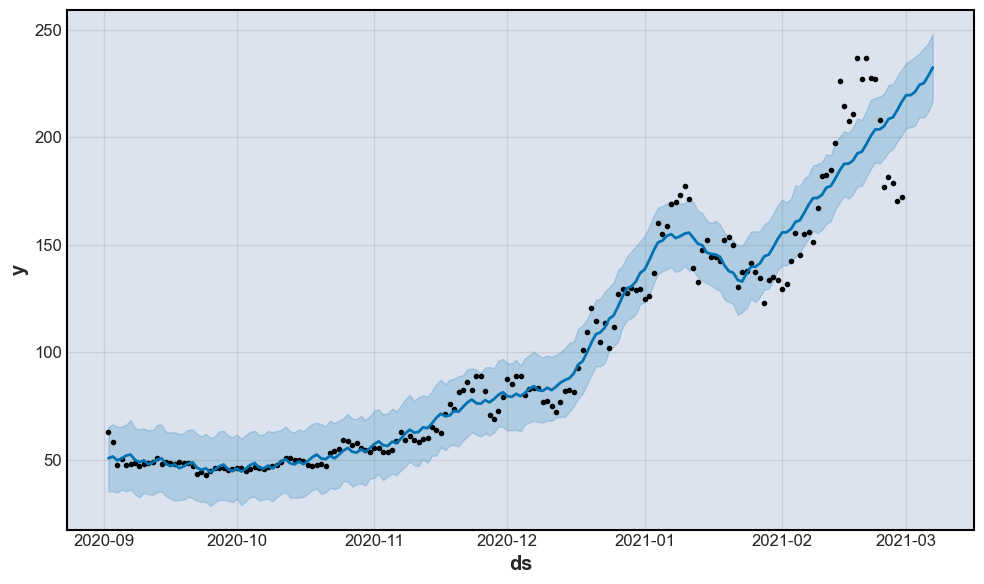

In [9]:
m.plot(forecast)

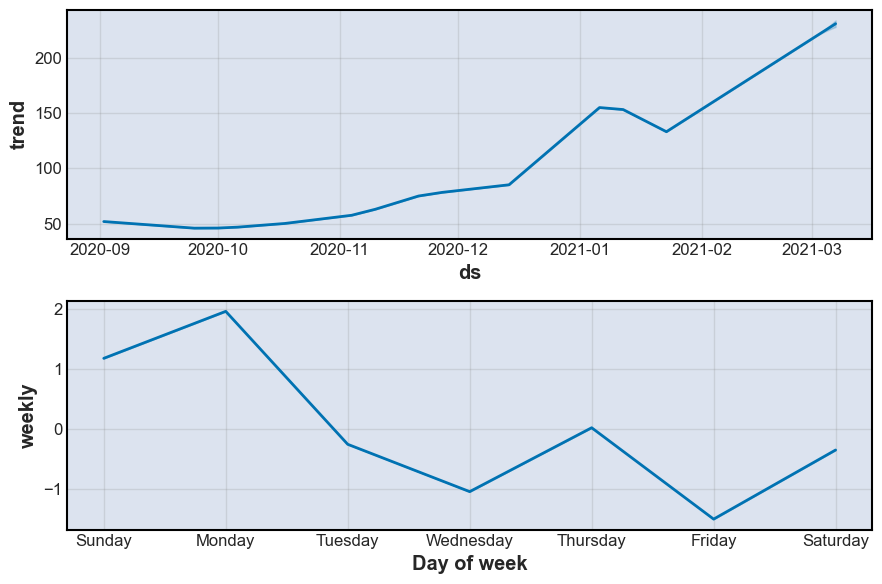

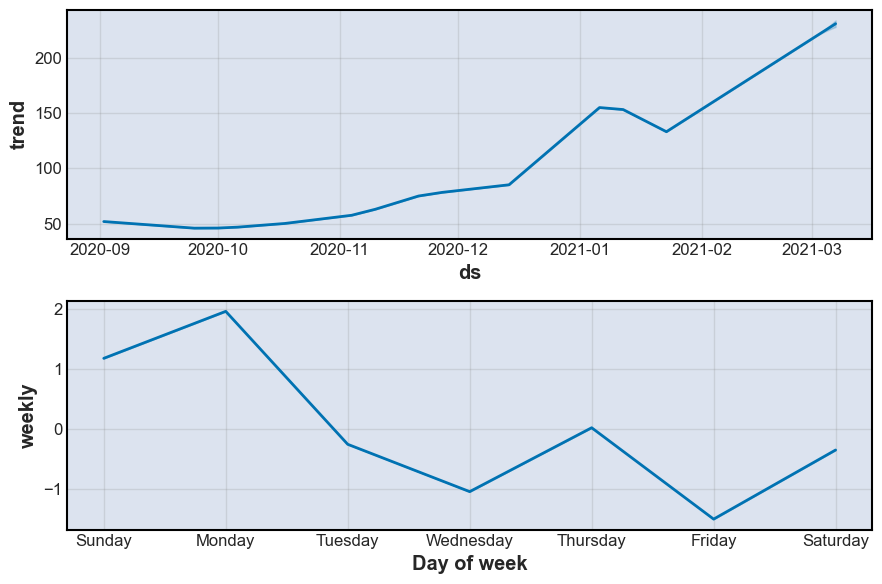

In [10]:
m.plot_components(forecast)